<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-analysis:-Impact-of-Covid-19-pandemic-on-the-air-quality" data-toc-modified-id="Final-analysis:-Impact-of-Covid-19-pandemic-on-the-air-quality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final analysis: Impact of Covid-19 pandemic on the air quality</a></span><ul class="toc-item"><li><span><a href="#Import-the-air-quality-and-covid-data-files" data-toc-modified-id="Import-the-air-quality-and-covid-data-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the air quality and covid data files</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-Australia's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-Australia's-air-quality-in-2020H1?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in Australia's air quality in 2020H1?</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-India's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-India's-air-quality-in-2020H1?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in India's air quality in 2020H1?</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-the-world's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-the-world's-air-quality-in-2020H1?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in the world's air quality in 2020H1?</a></span></li></ul></li></ul></div>

# Final analysis: Impact of Covid-19 pandemic on the air quality

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy.stats import linregress

## Import the air quality and covid data files 

In [2]:
# Import the air data for the 88 countries
world_air = pd.read_csv("output_csv/clean_world_air.csv", parse_dates=True)
world_air.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2020-02-24,IR,Isfahan,pm25,129,54.0,194.0,126.0,10921.40,"Iran, Islamic Republic of"
1,2020-05-07,IR,Isfahan,pm25,168,17.0,168.0,91.0,14014.00,"Iran, Islamic Republic of"
2,2020-05-28,IR,Isfahan,pm25,127,17.0,115.0,72.0,3558.56,"Iran, Islamic Republic of"
3,2020-02-20,IR,Isfahan,pm25,113,26.0,181.0,76.0,11209.80,"Iran, Islamic Republic of"
4,2020-02-23,IR,Isfahan,pm25,132,22.0,132.0,76.0,3209.67,"Iran, Islamic Republic of"


In [3]:
# Check the data types and any missing values
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464925 entries, 0 to 1464924
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date          1464925 non-null  object 
 1   Country_code  1464925 non-null  object 
 2   City          1464925 non-null  object 
 3   Specie        1464925 non-null  object 
 4   count         1464925 non-null  int64  
 5   min           1464925 non-null  float64
 6   max           1464925 non-null  float64
 7   median        1464925 non-null  float64
 8   variance      1464925 non-null  float64
 9   Country_name  1464925 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 111.8+ MB


In [4]:
# Change the data type of the Date column into datetime
world_air['Date'] = world_air['Date'].astype('datetime64[ns]')

In [5]:
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464925 entries, 0 to 1464924
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Date          1464925 non-null  datetime64[ns]
 1   Country_code  1464925 non-null  object        
 2   City          1464925 non-null  object        
 3   Specie        1464925 non-null  object        
 4   count         1464925 non-null  int64         
 5   min           1464925 non-null  float64       
 6   max           1464925 non-null  float64       
 7   median        1464925 non-null  float64       
 8   variance      1464925 non-null  float64       
 9   Country_name  1464925 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 111.8+ MB


In [6]:
# Import the covid data total active cases for the 88 countries 
active_world_covid = pd.read_csv("output_csv/active_world_covid.csv", parse_dates=True)
active_world_covid.head()

,Date,Total active cases
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1350
4,2020-01-26,2005


In [7]:
# Check the data types and any missing values
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                162 non-null    object
 1   Total active cases  162 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [8]:
# Change the data type of the Date column into datetime
active_world_covid['Date'] = active_world_covid['Date'].astype('datetime64[ns]')

In [9]:
# Double check the data types
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                162 non-null    datetime64[ns]
 1   Total active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


In [10]:
# Import the covid active case data for Australia
active_au_covid = pd.read_csv("output_csv/active_au_covid.csv", parse_dates=True)
active_au_covid.head()

,Date,Country,Active cases
0,2020-01-22,Australia,0
1,2020-01-23,Australia,0
2,2020-01-24,Australia,0
3,2020-01-25,Australia,0
4,2020-01-26,Australia,4


In [11]:
# Check data types of the covid active case data for Australia
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          162 non-null    object
 1   Country       162 non-null    object
 2   Active cases  162 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [12]:
# Change the data type of the Date column into datetime
active_au_covid['Date'] = active_au_covid['Date'].astype('datetime64[ns]')

In [13]:
# Double check the data types for the covid active case data for Australia
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          162 non-null    datetime64[ns]
 1   Country       162 non-null    object        
 2   Active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ KB


In [14]:
# Import the covid active case data for India
active_india_covid = pd.read_csv("output_csv/active_india_covid.csv", parse_dates=True)
active_india_covid.head()

,Date,Country,Active cases
0,2020-01-22,India,0
1,2020-01-23,India,0
2,2020-01-24,India,0
3,2020-01-25,India,0
4,2020-01-26,India,0


In [15]:
# Check data types of the covid active case data for India
active_india_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          162 non-null    object
 1   Country       162 non-null    object
 2   Active cases  162 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [16]:
# Change the data type of the Date column into datetime
active_india_covid['Date'] = active_india_covid['Date'].astype('datetime64[ns]')

In [17]:
# Double check the data types for the covid active case data for India
active_india_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          162 non-null    datetime64[ns]
 1   Country       162 non-null    object        
 2   Active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ KB


In [18]:
# Define a function to do the following steps:
    ## Transpose an air dataframe from long to wide: for each specie, turn the country_code into columns
    ## For the world air data, get the median of specie values of the 88 countries to represent the world
    ## Merge the covid data with the air data on Date.
    
def world_air_covid_each_specie(airdf, specie, covid_df):
    air_median_specie_transposed = airdf[airdf["Specie"] == specie].pivot_table(
        index="Date", columns="Country_code", values="median", aggfunc=np.median)

    air_median_specie_transposed[f"Median {specie}"] = air_median_specie_transposed.median(axis=1)

    final_air_median_specie_transposed = air_median_specie_transposed.iloc[:, -1].to_frame().reset_index()

    air_covid_median_specie = pd.merge(
        covid_df, final_air_median_specie_transposed, how="inner", on="Date")
    return air_covid_median_specie

> In the above function, the **air_median_specie_transposed** uses **aggfunc=np.median** to get the median value of the distribution of each specie's median values measured in cities under each country in the dataset. The **Median {specie}** column added to this dataframe then takes the median value of the distribution of each specie in all countries on the same date. The median aggregate functions are used to minimise the impact of outliers in the air quality dataset.

In [19]:
# Create a function to do the following steps:
    ## Perform a linear regression on number of covid active cases vs median value of an air pollutant
    ## Create equation of line to calculate predicted median value of an air pollutant for future Covid active cases
    ## Generate a scatter plot of the number of covid active cases vs median value of an air pollutant
    ## Plot the linear model on top of the scatter plot

def linear_regression_plot(df, x, y, df_name, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = slope * df[x] + intercept

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(df[x], df[y], facecolors="dodgerblue", alpha=0.5)
    plt.plot(df[x], regress_values, "b--", linewidth=1)
    plt.annotate(line_eq, (df[x].quantile(0.75), df[y].quantile(0.75)), fontsize=15, color="blue")
    
    plt.xlabel(f"Number of {x}")
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(f"images/{df_name}_linear.png")
    plt.show()

## How has change in Covid-19 active cases correlated with change in Australia's air quality in 2020H1?

In [20]:
# Filter the air data for Australia
au_air_df = world_air[world_air["Country_code"]=="AU"].copy()
au_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
490904,2020-02-04,AU,Sydney,co,56,1.2,4.5,3.4,10.12,Australia
490905,2020-03-29,AU,Sydney,co,9,1.2,3.4,2.3,9.07,Australia
490906,2020-06-26,AU,Sydney,co,45,1.2,6.7,2.3,17.91,Australia
490907,2020-05-22,AU,Sydney,co,14,1.2,2.3,1.2,2.19,Australia
490908,2020-06-04,AU,Sydney,co,33,1.2,5.6,2.3,16.16,Australia


In [21]:
# Create a merged data frame for median CO data and covid active cases for Australia based on shared date
au_air_covid_co = world_air_covid_each_specie(airdf=au_air_df, specie="co", covid_df=active_au_covid)
au_air_covid_co.head()

,Date,Country,Active cases,Median co
0,2020-01-22,Australia,0,2.15
1,2020-01-23,Australia,0,2.15
2,2020-01-24,Australia,0,3.15
3,2020-01-25,Australia,0,2.10
4,2020-01-26,Australia,4,2.30


The correlation coefficient is: -0.27682230150022347
The r-squared is: 0.07663058660788062


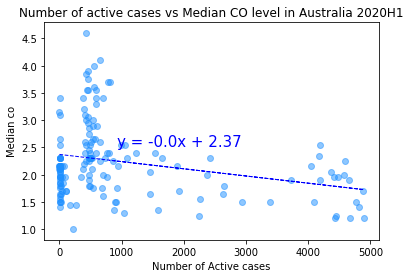

In [22]:
# Perform a linear regression model for the Number of Active cases vs Median CO values
linear_regression_plot(au_air_covid_co, "Active cases", "Median co", "au_air_covid_co",
                       "Number of active cases vs Median CO level in Australia 2020H1")

* There is a weak negative correlation between number of active covid cases and median CO values in Australia in 2020H1.
* The r-squared value tells us that only 7.7% of the variability in the median CO values in Australia in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [23]:
# Create a merged data frame for median pm2.5 data and covid active cases for Australia based on shared date

au_air_covid_pm25 = world_air_covid_each_specie(airdf=au_air_df, specie="pm25", covid_df=active_au_covid)
au_air_covid_pm25.head()

,Date,Country,Active cases,Median pm25
0,2020-01-22,Australia,0,25.0
1,2020-01-23,Australia,0,24.0
2,2020-01-24,Australia,0,25.0
3,2020-01-25,Australia,0,20.5
4,2020-01-26,Australia,4,19.5


The correlation coefficient is: -0.12186207920586578
The r-squared is: 0.014850366348376704


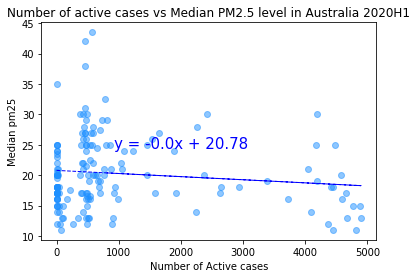

In [24]:
# Perform a linear regression model for the Number of Active cases vs Median PM2.5 values

linear_regression_plot(au_air_covid_pm25, "Active cases", "Median pm25", "au_air_covid_pm25",
                       "Number of active cases vs Median PM2.5 level in Australia 2020H1")

* There is a very weak negative correlation between number of active covid cases and median PM2.5 values in Australia in 2020H1.
* The r-squared value tells us that only 1.5% of the variability in the median PM2.5 values in Australia in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [25]:
# Create a merged data frame for median PM10 data and covid active cases for Australia based on shared date

au_air_covid_pm10 = world_air_covid_each_specie(airdf=au_air_df, specie="pm10", covid_df=active_au_covid)
au_air_covid_pm10.head()

,Date,Country,Active cases,Median pm10
0,2020-01-22,Australia,0,20.0
1,2020-01-23,Australia,0,20.0
2,2020-01-24,Australia,0,19.0
3,2020-01-25,Australia,0,18.0
4,2020-01-26,Australia,4,14.5


The correlation coefficient is: -0.2800507595892614
The r-squared is: 0.07842842794652229


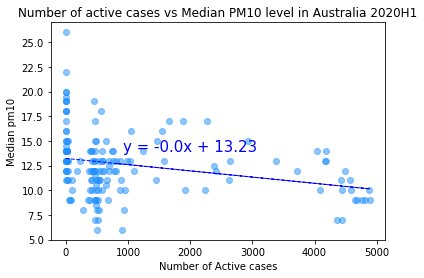

In [26]:
# Perform a linear regression model for the Number of Active cases vs Median PM10 values

linear_regression_plot(au_air_covid_pm10, "Active cases", "Median pm10", "au_air_covid_pm10",
                       "Number of active cases vs Median PM10 level in Australia 2020H1")

* There is a weak negative correlation between number of active covid cases and median PM10 values in Australia in 2020H1.
* The r-squared value tells us that only 7.8% of the variability in the median PM10 values in Australia in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [27]:
# Create a merged data frame for median NO2 data and covid active cases for Australia based on shared date

au_air_covid_no2 = world_air_covid_each_specie(airdf=au_air_df, specie="no2", covid_df=active_au_covid)
au_air_covid_no2.head()

,Date,Country,Active cases,Median no2
0,2020-01-22,Australia,0,3.8
1,2020-01-23,Australia,0,4.7
2,2020-01-24,Australia,0,3.4
3,2020-01-25,Australia,0,2.1
4,2020-01-26,Australia,4,3.3


The correlation coefficient is: 0.016429701804397717
The r-squared is: 0.0002699351013814296


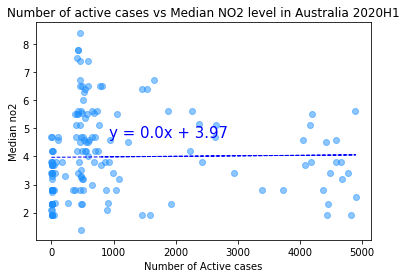

In [28]:
# Perform a linear regression model for the Number of Active cases vs Median NO2 values

linear_regression_plot(au_air_covid_no2, "Active cases", "Median no2", "au_air_covid_no2",
                       "Number of active cases vs Median NO2 level in Australia 2020H1")

* There is almost no correlation between number of active covid cases and median NO2 values in Australia in 2020H1.

In [29]:
# Create a merged data frame for median O3 data and covid active cases for Australia based on shared date

au_air_covid_o3 = world_air_covid_each_specie(airdf=au_air_df, specie="o3", covid_df=active_au_covid)
au_air_covid_o3.head()

,Date,Country,Active cases,Median o3
0,2020-01-22,Australia,0,11.40
1,2020-01-23,Australia,0,9.00
2,2020-01-24,Australia,0,7.55
3,2020-01-25,Australia,0,11.20
4,2020-01-26,Australia,4,10.40


The correlation coefficient is: 0.010602775504139674
The r-squared is: 0.00011241884839118432


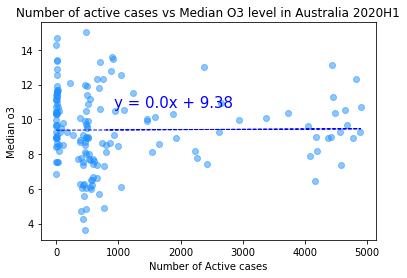

In [30]:
# Perform a linear regression model for the Number of Active cases vs Median O3 values

linear_regression_plot(au_air_covid_o3, "Active cases", "Median o3", "au_air_covid_o3",
                       "Number of active cases vs Median O3 level in Australia 2020H1")

* There is almost no correlation between number of active covid cases and median O3 values in Australia in 2020H1.

In [31]:
# Create a merged data frame for median SO2 data and covid active cases for Australia based on shared date

au_air_covid_so2 = world_air_covid_each_specie(airdf=au_air_df, specie="so2", covid_df=active_au_covid)
au_air_covid_so2.head()

,Date,Country,Active cases,Median so2
0,2020-01-22,Australia,0,1.5
1,2020-01-23,Australia,0,1.5
2,2020-01-24,Australia,0,1.6
3,2020-01-25,Australia,0,1.1
4,2020-01-26,Australia,4,1.4


The correlation coefficient is: -0.384509094238364
The r-squared is: 0.14784724355200707


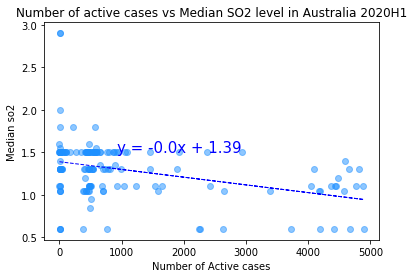

In [32]:
# Perform a linear regression model for the Number of Active cases vs Median SO2 values

linear_regression_plot(au_air_covid_so2, "Active cases", "Median so2", "au_air_covid_so2",
                       "Number of active cases vs Median SO2 level in Australia 2020H1")

* There is a weak negative correlation between number of active covid cases and median SO2 values in Australia in 2020H1.
* The r-squared value tells us that 14.8% of the variability in the median SO2 values in Australia in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

## How has change in Covid-19 active cases correlated with change in India's air quality in 2020H1?

In [33]:
# Filter the air data for India
in_air_df = world_air[world_air["Country_code"]=="IN"].copy()
in_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
1220811,2020-02-24,IN,Thrissur,co,24,2.1,11.2,5.3,58.36,India
1220812,2020-04-07,IN,Thrissur,co,72,2.3,13.6,8.1,131.11,India
1220813,2020-04-24,IN,Thrissur,co,67,1.4,12.2,9.2,126.02,India
1220814,2020-06-05,IN,Thrissur,co,72,0.7,26.8,14.1,532.05,India
1220815,2020-06-13,IN,Thrissur,co,72,0.3,30.3,15.0,671.30,India


In [34]:
# Create a merged data frame for median PM2.5 data and covid active cases for India based on shared date

in_air_covid_pm25 = world_air_covid_each_specie(airdf=in_air_df, specie="pm25", covid_df=active_india_covid)
in_air_covid_pm25.head()

,Date,Country,Active cases,Median pm25
0,2020-01-22,India,0,153.0
1,2020-01-23,India,0,153.0
2,2020-01-24,India,0,154.0
3,2020-01-25,India,0,158.0
4,2020-01-26,India,0,159.0


The correlation coefficient is: -0.5590992737953021
The r-squared is: 0.3125919979584342


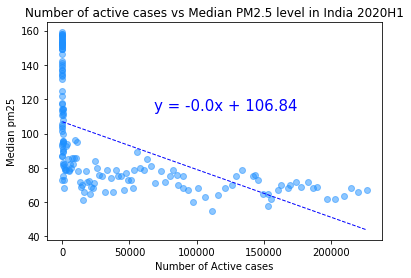

In [35]:
# Perform a linear regression model for the Number of Active cases vs Median PM2.5 values

linear_regression_plot(in_air_covid_pm25, "Active cases", "Median pm25", "in_air_covid_pm25",
                       "Number of active cases vs Median PM2.5 level in India 2020H1")

* There is a moderate negative correlation between number of active covid cases and median PM2.5 values in India in 2020H1.
* The r-squared value tells us that 31% of the variability in the median PM2.5 values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [36]:
# Create a merged data frame for median NO2 data and covid active case data for India based on shared date

in_air_covid_no2 = world_air_covid_each_specie(airdf=in_air_df, specie="no2", covid_df=active_india_covid)
in_air_covid_no2.head()

,Date,Country,Active cases,Median no2
0,2020-01-22,India,0,12.85
1,2020-01-23,India,0,12.60
2,2020-01-24,India,0,15.50
3,2020-01-25,India,0,17.45
4,2020-01-26,India,0,17.75


The correlation coefficient is: -0.5011354595928155
The r-squared is: 0.2511367488613024


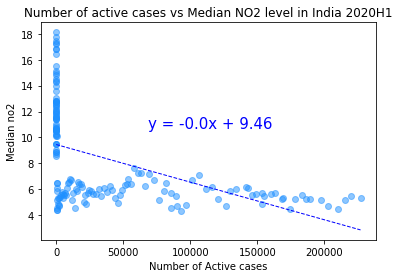

In [37]:
# Perform a linear regression model for the Number of Active cases vs Median NO2 values

linear_regression_plot(in_air_covid_no2, "Active cases", "Median no2", "in_air_covid_no2",
                       "Number of active cases vs Median NO2 level in India 2020H1")

* There is a moderate negative correlation between number of active covid cases and median NO2 values in India in 2020H1.
* The r-squared value tells us that 25% of the variability in the median NO2 values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [38]:
# Create a merged data frame for median PM10 data and covid active case data for India based on shared date

in_air_covid_pm10 = world_air_covid_each_specie(airdf=in_air_df, specie="pm10", covid_df=active_india_covid)
in_air_covid_pm10.head()

,Date,Country,Active cases,Median pm10
0,2020-01-22,India,0,77.0
1,2020-01-23,India,0,73.5
2,2020-01-24,India,0,79.5
3,2020-01-25,India,0,88.5
4,2020-01-26,India,0,88.5


The correlation coefficient is: -0.6328098339844632
The r-squared is: 0.4004482859874439


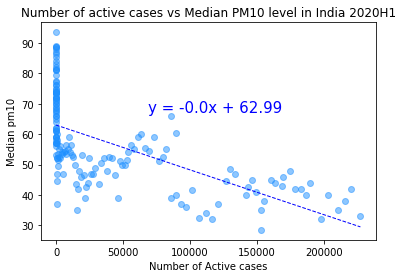

In [39]:
# Perform a linear regression model for the Number of Active cases vs Median PM10 values

linear_regression_plot(in_air_covid_pm10, "Active cases", "Median pm10", "in_air_covid_pm10",
                       "Number of active cases vs Median PM10 level in India 2020H1")

* There is a moderate negative correlation between number of active covid cases and median PM10 values in India in 2020H1.
* The r-squared value tells us that 40% of the variability in the median PM10 values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [40]:
# Create a merged data frame for median O3 data and covid active case data for India based on shared date

in_air_covid_o3 = world_air_covid_each_specie(airdf=in_air_df, specie="o3", covid_df=active_india_covid)
in_air_covid_o3.head()

,Date,Country,Active cases,Median o3
0,2020-01-22,India,0,9.20
1,2020-01-23,India,0,10.35
2,2020-01-24,India,0,9.90
3,2020-01-25,India,0,7.90
4,2020-01-26,India,0,7.30


The correlation coefficient is: -0.32558148446257373
The r-squared is: 0.10600330302485314


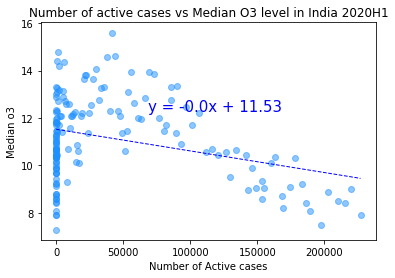

In [41]:
# Perform a linear regression model for the Number of Active cases vs Median O3 values

linear_regression_plot(in_air_covid_o3, "Active cases", "Median o3", "in_air_covid_o3",
                       "Number of active cases vs Median O3 level in India 2020H1")

* There is a weak negative correlation between number of active covid cases and median O3 values in India in 2020H1.
* The r-squared value tells us that only 10% of the variability in the median O3 values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [42]:
# Create a merged data frame for median SO2 data and covid active case data for India based on shared date

in_air_covid_so2 = world_air_covid_each_specie(airdf=in_air_df, specie="so2", covid_df=active_india_covid)
in_air_covid_so2.head()

,Date,Country,Active cases,Median so2
0,2020-01-22,India,0,4.55
1,2020-01-23,India,0,4.45
2,2020-01-24,India,0,4.40
3,2020-01-25,India,0,4.95
4,2020-01-26,India,0,4.75


The correlation coefficient is: -0.6216286293193106
The r-squared is: 0.3864221527894049


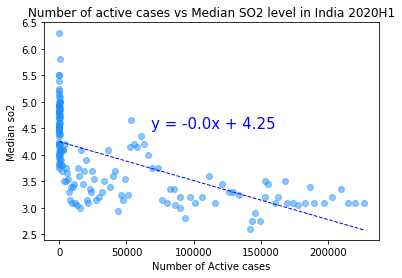

In [43]:
# Perform a linear regression model for the Number of Active cases vs Median SO2 values

linear_regression_plot(in_air_covid_so2, "Active cases", "Median so2", "in_air_covid_so2",
                       "Number of active cases vs Median SO2 level in India 2020H1")

* There is a moderate negative correlation between number of active covid cases and median SO2 values in India in 2020H1.
* The r-squared value tells us that 39% of the variability in the median SO2 values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [44]:
# Create a merged data frame for median CO data and covid active case data for India based on shared date

in_air_covid_co = world_air_covid_each_specie(airdf=in_air_df, specie="co", covid_df=active_india_covid)
in_air_covid_co.head()

,Date,Country,Active cases,Median co
0,2020-01-22,India,0,8.55
1,2020-01-23,India,0,7.50
2,2020-01-24,India,0,6.85
3,2020-01-25,India,0,8.95
4,2020-01-26,India,0,9.10


The correlation coefficient is: -0.46327863178099465
The r-squared is: 0.21462709066487043


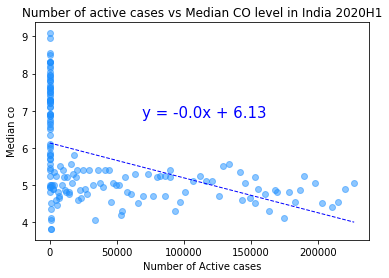

In [45]:
# Perform a linear regression model for the Number of Active cases vs Median CO values

linear_regression_plot(in_air_covid_co, "Active cases", "Median co", "in_air_covid_co",
                       "Number of active cases vs Median CO level in India 2020H1")

* There is a weak negative correlation between number of active covid cases and median CO values in India in 2020H1.
* The r-squared value tells us that 21% of the variability in the median CO values in India in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

> Comparing the correlations between the number of Covid-19 active cases and the median values of the air pollutant between Australia and India, it seems that Covid-19 has had somewhat larger impact on the air quality of India than Australia. While most of the correlations between the number of covid active cases and median values of the air pollutants in Australia are weak or non-existent, most of those in India are moderate. This could be explained by the fact that in normal situations, the air quality of India is generally much worse than that of Australia. Hence, the impact of lockdowns from Covid-19 would lead to more change in air quality in India.

## How has change in Covid-19 active cases correlated with change in the world's air quality in 2020H1?

The world here means the 88 countries as explained in the data exploration notebook.

In [46]:
# Create a merged data frame for median PM2.5 data and covid active case data for the world based on shared date

world_air_covid_median_pm25 = world_air_covid_each_specie(world_air, "pm25", active_world_covid)
world_air_covid_median_pm25.head()

,Date,Total active cases,Median pm25
0,2020-01-22,510,62.75
1,2020-01-23,606,68.00
2,2020-01-24,879,66.25
3,2020-01-25,1350,66.00
4,2020-01-26,2005,65.25


The correlation coefficient is: -0.7629165783871087
The r-squared is: 0.5820417055778934


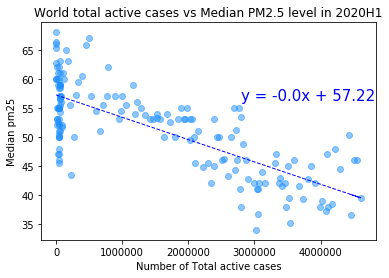

In [47]:
# Perform a linear regression model for the Number of Active cases vs Median PM2.5 values

linear_regression_plot(world_air_covid_median_pm25, "Total active cases", "Median pm25", "world_air_covid_median_pm25",
                       "World total active cases vs Median PM2.5 level in 2020H1")

* There is a strong negative correlation between number of active covid cases and median PM2.5 values in the 88 countries in 2020H1.
* The r-squared value tells us that 58% of the variability in the median PM2.5 values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [48]:
# Create a merged data frame for median PM10 data and covid active case data for the world based on shared date

world_air_covid_median_pm10 = world_air_covid_each_specie(world_air, "pm10", active_world_covid)
world_air_covid_median_pm10.head()

,Date,Total active cases,Median pm10
0,2020-01-22,510,28.0
1,2020-01-23,606,26.0
2,2020-01-24,879,29.0
3,2020-01-25,1350,28.0
4,2020-01-26,2005,24.0


The correlation coefficient is: -0.5067582713167661
The r-squared is: 0.2568039455479571


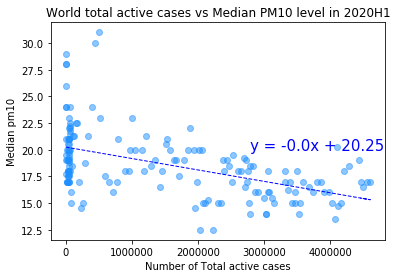

In [49]:
# Perform a linear regression model for the Number of Active cases vs Median PM10 values

linear_regression_plot(world_air_covid_median_pm10, "Total active cases", "Median pm10", "world_air_covid_median_pm10",
                       "World total active cases vs Median PM10 level in 2020H1")

* There is a moderate negative correlation between number of active covid cases and median PM10 values in the 88 countries in 2020H1.
* The r-squared value tells us that 25.7% of the variability in the median PM10 values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [50]:
# Create a merged data frame for median CO data and covid active case data for the world based on shared date

world_air_covid_median_co = world_air_covid_each_specie(world_air, "co", active_world_covid)
world_air_covid_median_co.head()

,Date,Total active cases,Median co
0,2020-01-22,510,3.85
1,2020-01-23,606,4.10
2,2020-01-24,879,4.50
3,2020-01-25,1350,3.70
4,2020-01-26,2005,3.20


The correlation coefficient is: -0.5012135612584958
The r-squared is: 0.2512150339894239


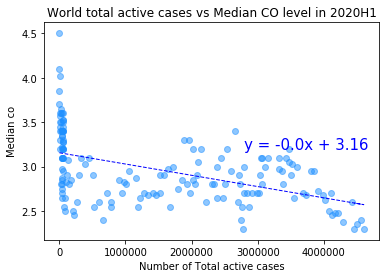

In [51]:
# Perform a linear regression model for the Number of Active cases vs Median CO values

linear_regression_plot(world_air_covid_median_co, "Total active cases", "Median co", "world_air_covid_median_co",
                       "World total active cases vs Median CO level in 2020H1")

* There is a moderate negative correlation between number of active covid cases and median CO values in the 88 countries in 2020H1.
* The r-squared value tells us that 25% of the variability in the median CO values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [52]:
# Create a merged data frame for median NO2 data and covid active case data for the world based on shared date

world_air_covid_median_no2 = world_air_covid_each_specie(world_air, "no2", active_world_covid)
world_air_covid_median_no2.head()

,Date,Total active cases,Median no2
0,2020-01-22,510,12.850
1,2020-01-23,606,12.700
2,2020-01-24,879,10.875
3,2020-01-25,1350,9.800
4,2020-01-26,2005,8.700


The correlation coefficient is: -0.5844896343454943
The r-squared is: 0.3416281326573296


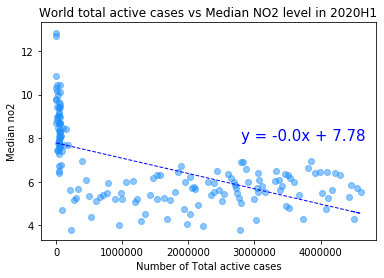

In [53]:
# Perform a linear regression model for the Number of Active cases vs Median NO2 values

linear_regression_plot(world_air_covid_median_no2, "Total active cases", "Median no2", "world_air_covid_median_no2",
                       "World total active cases vs Median NO2 level in 2020H1")

* There is a moderate negative correlation between number of active covid cases and median NO2 values in the 88 countries in 2020H1.
* The r-squared value tells us that 34% of the variability in the median NO2 values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [54]:
# Create a merged data frame for median SO2 data and covid active case data for the world based on shared date

world_air_covid_median_so2 = world_air_covid_each_specie(world_air, "so2", active_world_covid)
world_air_covid_median_so2.head()

,Date,Total active cases,Median so2
0,2020-01-22,510,2.00
1,2020-01-23,606,2.10
2,2020-01-24,879,2.15
3,2020-01-25,1350,2.15
4,2020-01-26,2005,2.00


The correlation coefficient is: -0.5795984066016522
The r-squared is: 0.3359343129351741


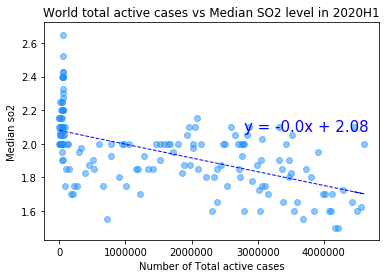

In [55]:
# Perform a linear regression model for the Number of Active cases vs Median SO2 values

linear_regression_plot(world_air_covid_median_so2, "Total active cases", "Median so2", "world_air_covid_median_so2",
                       "World total active cases vs Median SO2 level in 2020H1")

* There is a moderate negative correlation between number of active covid cases and median SO2 values in the 88 countries in 2020H1.
* The r-squared value tells us that 33.6% of the variability in the median SO2 values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

In [56]:
# Create a merged data frame for median O3 data and covid active case data for the world based on shared date

world_air_covid_median_o3 = world_air_covid_each_specie(world_air, "o3", active_world_covid)
world_air_covid_median_o3.head()

,Date,Total active cases,Median o3
0,2020-01-22,510,11.900
1,2020-01-23,606,10.400
2,2020-01-24,879,12.250
3,2020-01-25,1350,12.725
4,2020-01-26,2005,12.900


The correlation coefficient is: 0.4355713621454461
The r-squared is: 0.18972241152123936


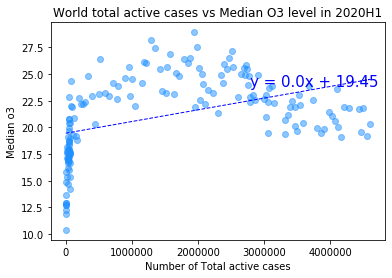

In [57]:
# Perform a linear regression model for the Number of Active cases vs Median O3 values

linear_regression_plot(world_air_covid_median_o3, "Total active cases", "Median o3", "world_air_covid_median_o3",
                       "World total active cases vs Median O3 level in 2020H1")

* There is a weak positive correlation between number of active covid cases and median O3 values in the 88 countries in 2020H1.
* The r-squared value tells us that 19% of the variability in the median O3 values in the 88 countries in 2020H1 could be explained by the linear regression model (i.e. the change in the number of active cases in 2020H1).

> In summary, most of the correlations between the number of active covid cases and median values of the air pollutants in the 88 countries in 2020H1 explained by the linear regression models are moderately strong. Out of the 6 air pollutants, only the median O3 is positively correlated with the number of total active cases. This could be explained by the fact that ground level ozone is mostly impacted by the presence of sunlight. Most of the 88 countries are in the Northern hemisphere during the first months into the pandemic. This means that most the studied countries are in summer, which explains for the higher O3 level.